<a href="https://www.spe.org/events/en/2022/conference/22apog/asia-pacific-oil-and-gas-conference-and-exhibition.html"><img src = "https://www.spe.org/binaries/content/gallery/specms/speevents/organization-logos/spe-logo-2020.png" width = 200> 

<h1 align=center><font size = 5>Prediction of Recovery Factor using Machine Learning Methods</font></h1>

<h1 align=center><font size = 4> Munish Kumar, Kannapan Swaminathan</font></h1>
<h1 align=center><font size = 4> Part A: Data Cleaning and Processing</font></h1>
<h1 align=center><font size = 3> ERCE 2022 </font></h1>

1. https://www.kaggle.com/code/kkhandekar/an-introduction-to-pycaret/notebook.
2. https://towardsdatascience.com/5-things-you-dont-know-about-pycaret-528db0436eec
3. https://www.dataquest.io/blog/understanding-regression-error-metrics/ 
4. https://www.analyticsvidhya.com/blog/2021/07/automl-using-pycaret-with-a-regression-use-case/
5. https://www.datacamp.com/community/tutorials/guide-for-automating-ml-workflows-using-pycaret
6. https://pycaret.readthedocs.io/en/latest/api/regression.html
7. http://www.pycaret.org/tutorials/html/REG102.html
8. https://githubhelp.com/ray-project/tune-sklearn

In [1]:
# Only install the following libraries if you dont have it, otherwise leave it commented out

#!conda install -c anaconda natsort --yes
#!conda install -c anaconda xlrd --yes
#!conda install -c anaconda plotly --yes
#!conda install -c anaconda folium --yes
#!pip install folium

# General Libraries
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
import time
import re
import requests
import pickle
import seaborn as sns
import os
import glob
import sys
from natsort import natsorted
sns.set()

import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Sklearn Liraries
from sklearn import preprocessing

import datetime
from datetime import timedelta, date 
start = time.time()
%matplotlib inline

import folium
import shapefile as shp

# Forces the print statement to show everything and not truncate
# np.set_printoptions(threshold=sys.maxsize) 
print('Libraries imported')

Libraries imported


In [2]:
#Receive Data
#dir_name = r'C:\Users\mkumar\Documents\GitHub\munishkumar-gh.github.io\@Working\SPE_Paper'
dir_name = r'C:\Users\kswaminathan\OneDrive\01_KannaLibrary\15_Analogs'
filename_suffix = 'xlsx'

In [3]:
skiprows = 0
#Means read in the ',' as thousand seperator. Also drops all columns which are unnamed.
df = pd.read_excel("TORIS.xlsx", thousands=',', skiprows = skiprows)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')] 
df.head()

,DOE Field Code,State,Lithology Code,Geologic Age Code,Field Name,Reservoir Name,DOE Ref,Preparer,Formation Name,Field Acres,...,Geologic Play,Deposition System,Deg of Conf1,Diagenetic Overprint,Deg of Conf2,Structural Comp,Deg of Conf3,Heterogeniety,Trap Type,Geologic Province
0,0,AK,1,122,GRANITE POINT,MIDDLE KENAI,2877,8300,-,3200.0,...,303,132,1,1,1,10,1,1,2,67
1,0,AK,1,217,KUPARUK RIVER,KUPARUK RIVER,3190,8575,-,240000.0,...,301,172,1,1,1,10,1,1,3,58
2,0,AK,1,123,MCARTHUR RIVER,HEMLOCK,3078,8048,-,12400.0,...,303,131,1,1,1,10,1,1,2,67
3,0,AK,1,123,MCARTHUR RIVER,TYONEK MIDDLE KENAI G ZONE,3079,8049,-,2400.0,...,303,132,1,1,1,10,1,1,2,67
4,0,AK,1,124,MCARTHUR RIVER,WEST FORELAND,3080,8050,-,1515.0,...,303,132,1,1,1,10,1,1,2,67


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 70 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DOE Field Code        1381 non-null   int64  
 1   State                 1381 non-null   object 
 2   Lithology Code        1381 non-null   int64  
 3   Geologic Age Code     1381 non-null   int64  
 4   Field Name            1379 non-null   object 
 5   Reservoir Name        1211 non-null   object 
 6   DOE Ref               1381 non-null   int64  
 7   Preparer              1381 non-null   int64  
 8   Formation Name        1381 non-null   object 
 9   Field Acres           1381 non-null   float64
 10  Proven Acres          1381 non-null   int64  
 11  Well Spacing          1381 non-null   float64
 12  Total Wells           1381 non-null   int64  
 13  Net Pay Pay           1381 non-null   float64
 14  Gross Pay             1381 non-null   float64
 15  Porosity             

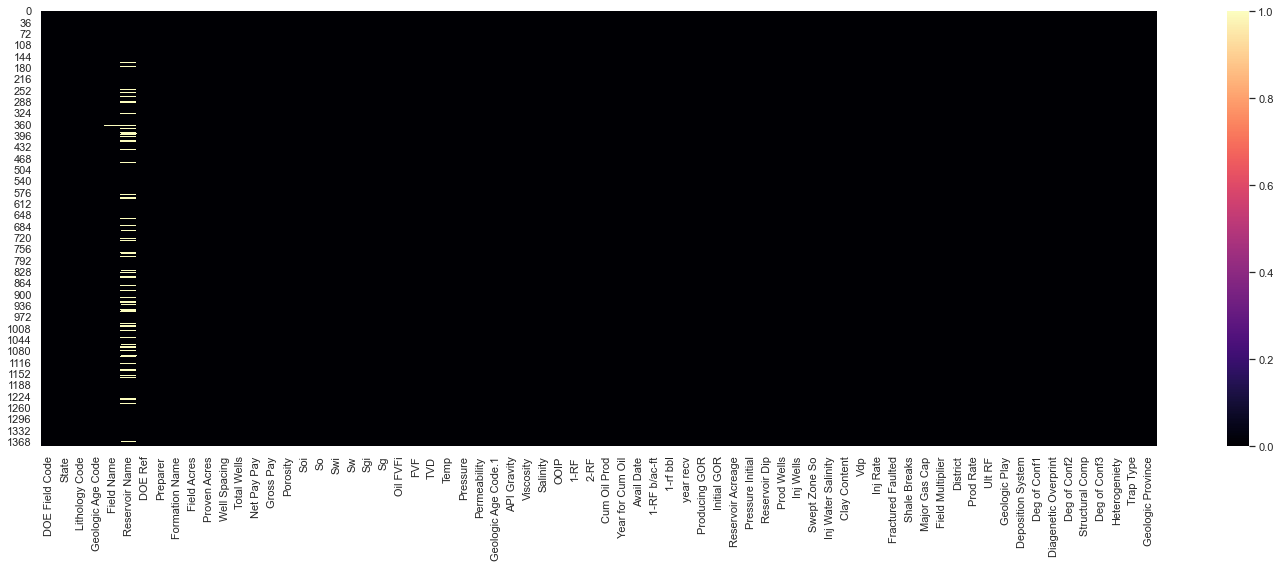

In [5]:
#check for missing values
fig, ax = plt.subplots(figsize=(25,8))
sns.heatmap(df.isnull(), ax=ax, cmap="magma")
plt.grid()
plt.show()

In [6]:
df2 = df._get_numeric_data()

In [7]:
for col in df2.columns:
    df2[col][df2[col] < 0] = np.nan

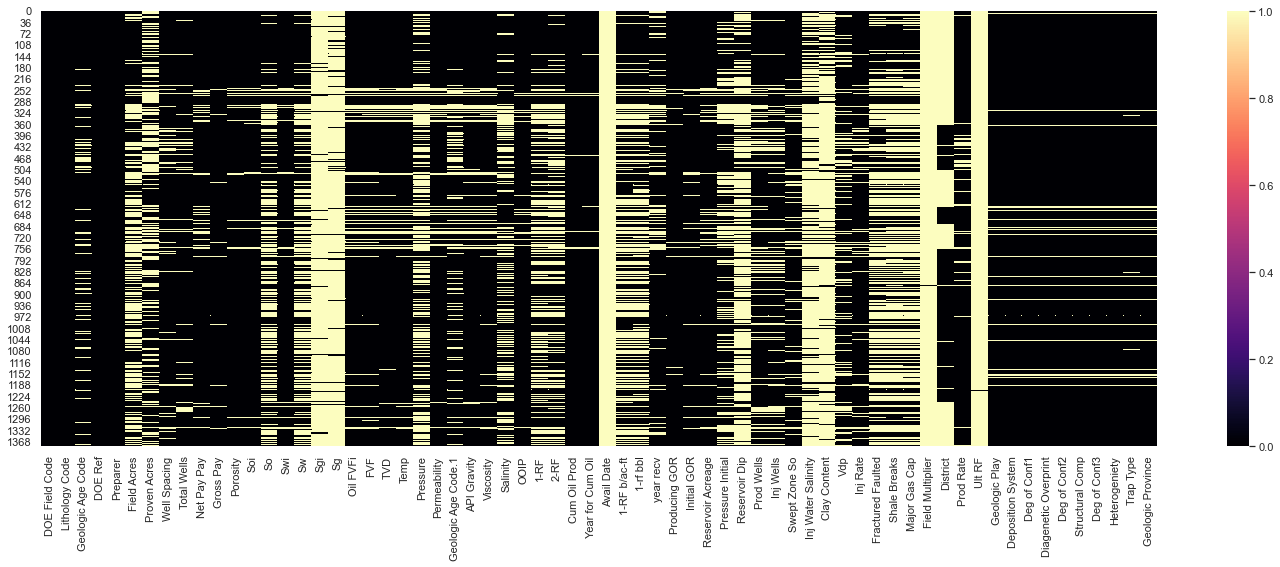

In [8]:
#check for missing values
fig, ax = plt.subplots(figsize=(25,8))
sns.heatmap(df2.isnull(), ax=ax, cmap="magma")
plt.grid()
plt.show()

In [9]:
df3 = df.loc[:, df.columns.str.contains('RF')]

In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1-RF          1381 non-null   float64
 1   2-RF          1381 non-null   float64
 2   1-RF b/ac-ft  1381 non-null   float64
 3   Ult RF        1381 non-null   float64
dtypes: float64(4)
memory usage: 43.3 KB


In [11]:
#check for missing values
df.isnull().sum().sort_values(ascending=False)

Reservoir Name       170
Field Name             2
Geologic Province      0
Pressure               0
Sgi                    0
                    ... 
year recv              0
1-rf bbl               0
1-RF b/ac-ft           0
Avail Date             0
DOE Field Code         0
Length: 70, dtype: int64

In [12]:
#Drop rows with missing values for Reservoir Name
df = df.dropna(axis=0, subset=['Reservoir Name'])

In [13]:
#check for missing values after dropping
df.isnull().sum().sort_values(ascending=False)

Geologic Province    0
Temp                 0
Sw                   0
Sgi                  0
Sg                   0
                    ..
year recv            0
1-rf bbl             0
1-RF b/ac-ft         0
Avail Date           0
DOE Field Code       0
Length: 70, dtype: int64

In [14]:
print(df.shape)

(1211, 70)


In [15]:
# SCREEN 1 Drop Unnecessary Columns
df.drop(['State', 'Preparer', 'So', 'Sw', 'Sg', 'FVF', 'TVD', 'Pressure', 'Geologic Age Code', 'Salinity', 
              'Cum Oil Prod', 'Year for Cum Oil', 'Avail Date', '1-RF b/ac-ft', 'year recv', 'Producing GOR', 'Reservoir Dip', 
              'Prod Wells', 'Inj Wells', 'Swept Zone So', 'Inj Water Salinity', 'Clay Content', 'Inj Rate', 'Field Multiplier', 
              'District', 'Prod Rate', 'Deg of Conf1', 'Deg of Conf2', 'Deg of Conf3', 'Geologic Province'
               ], axis=1, inplace=True)

In [16]:
print(df.shape)

(1211, 40)


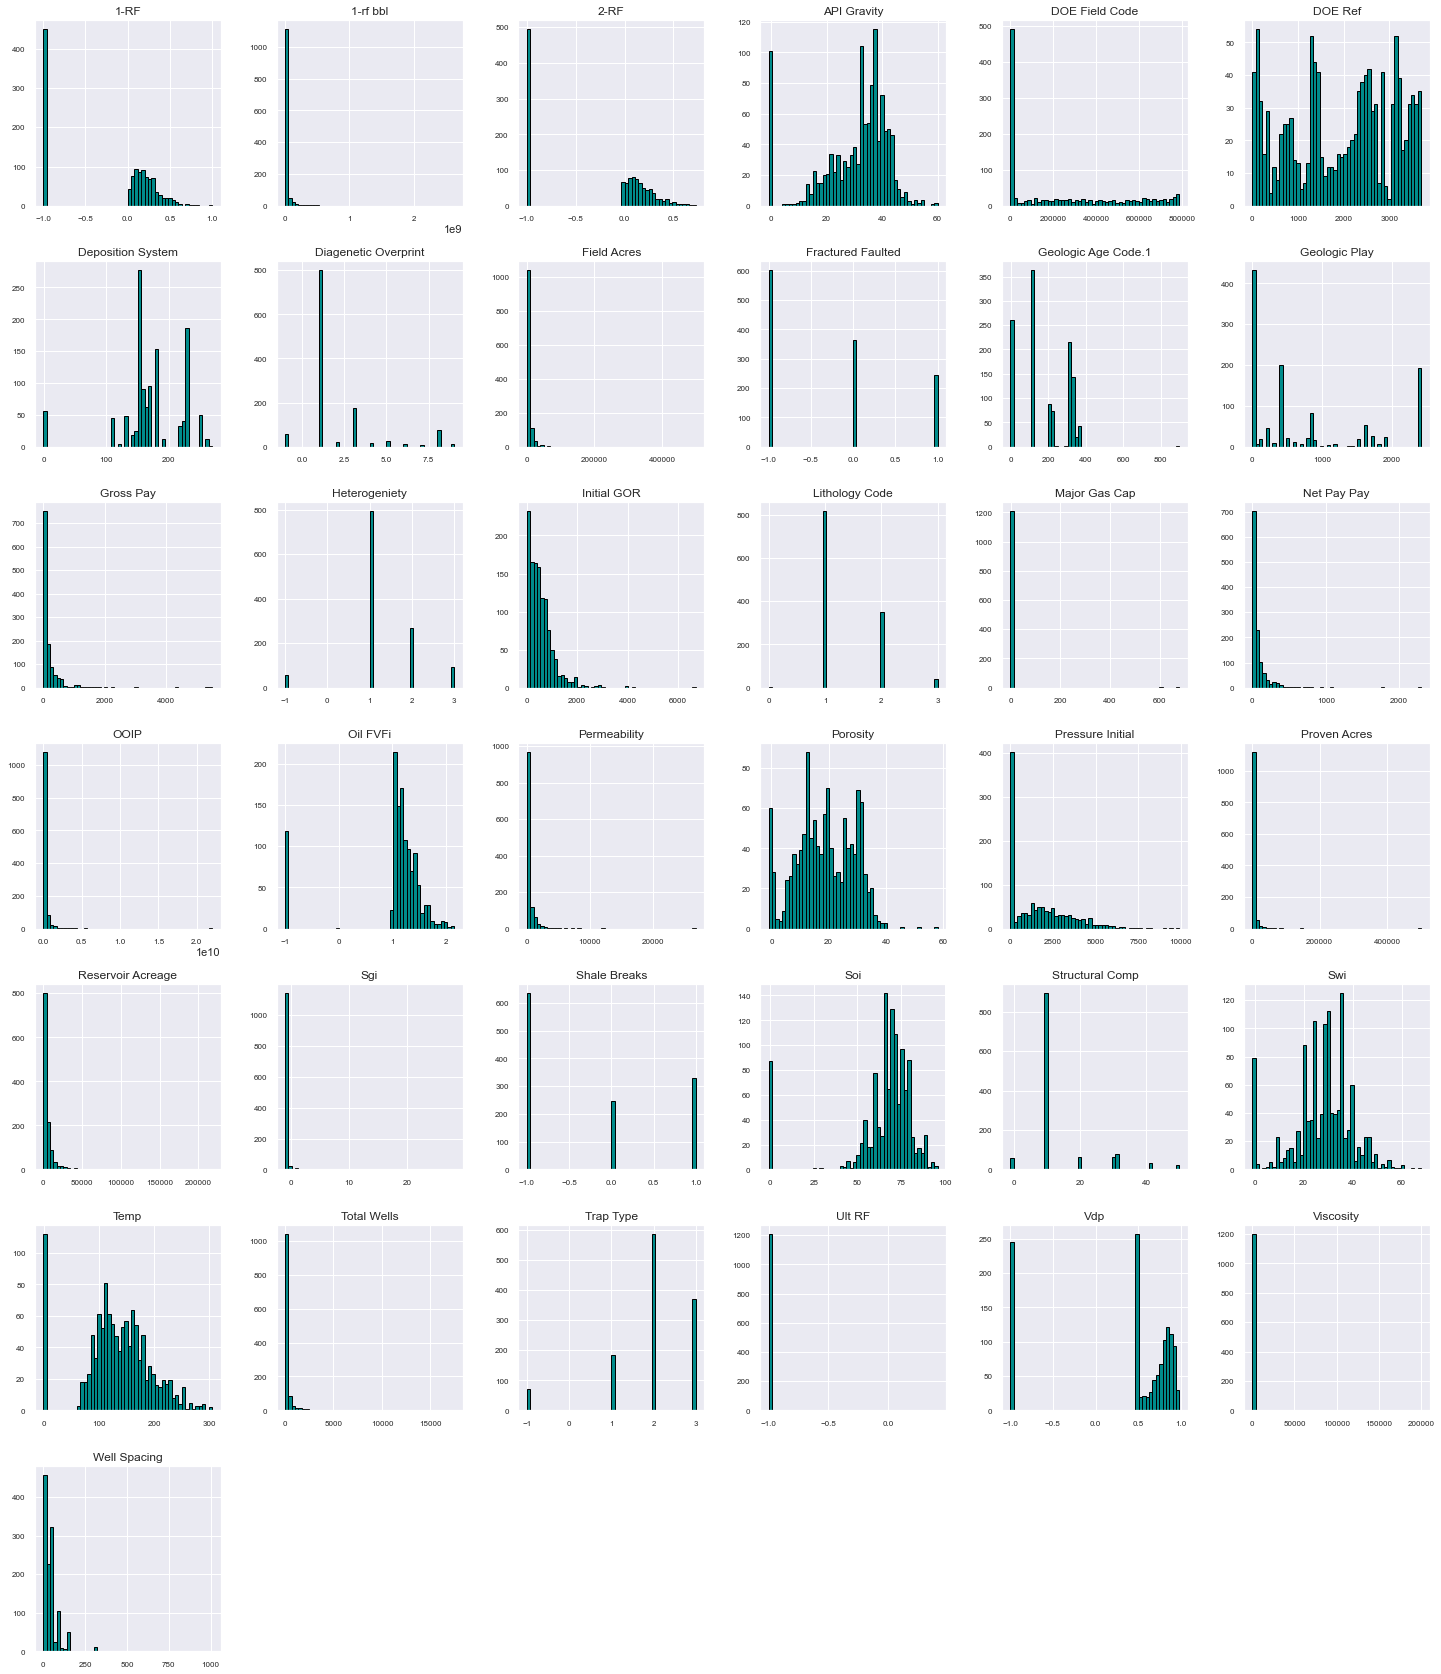

In [17]:
#Plot variables - Data Exploration 
fig_ = df.hist(figsize=(25, 30), bins=50, color="darkcyan",
                         edgecolor="black", xlabelsize=8, ylabelsize=8)

In [18]:
# SCREEN 2 Drop Unnecessary Columns
df.drop(['DOE Field Code', 'Geologic Age Code.1', 'DOE Ref', 'Proven Acres', 'Total Wells', 'Soi', 'Sgi', 
         '1-rf bbl', 'Reservoir Acreage', 'Ult RF', 'Field Acres'
               ], axis=1, inplace=True)

In [19]:
# SCREEN 2a Drop Unnecessary Columns
df.drop(['Field Name', 'Formation Name', 'Reservoir Name'
               ], axis=1, inplace=True)

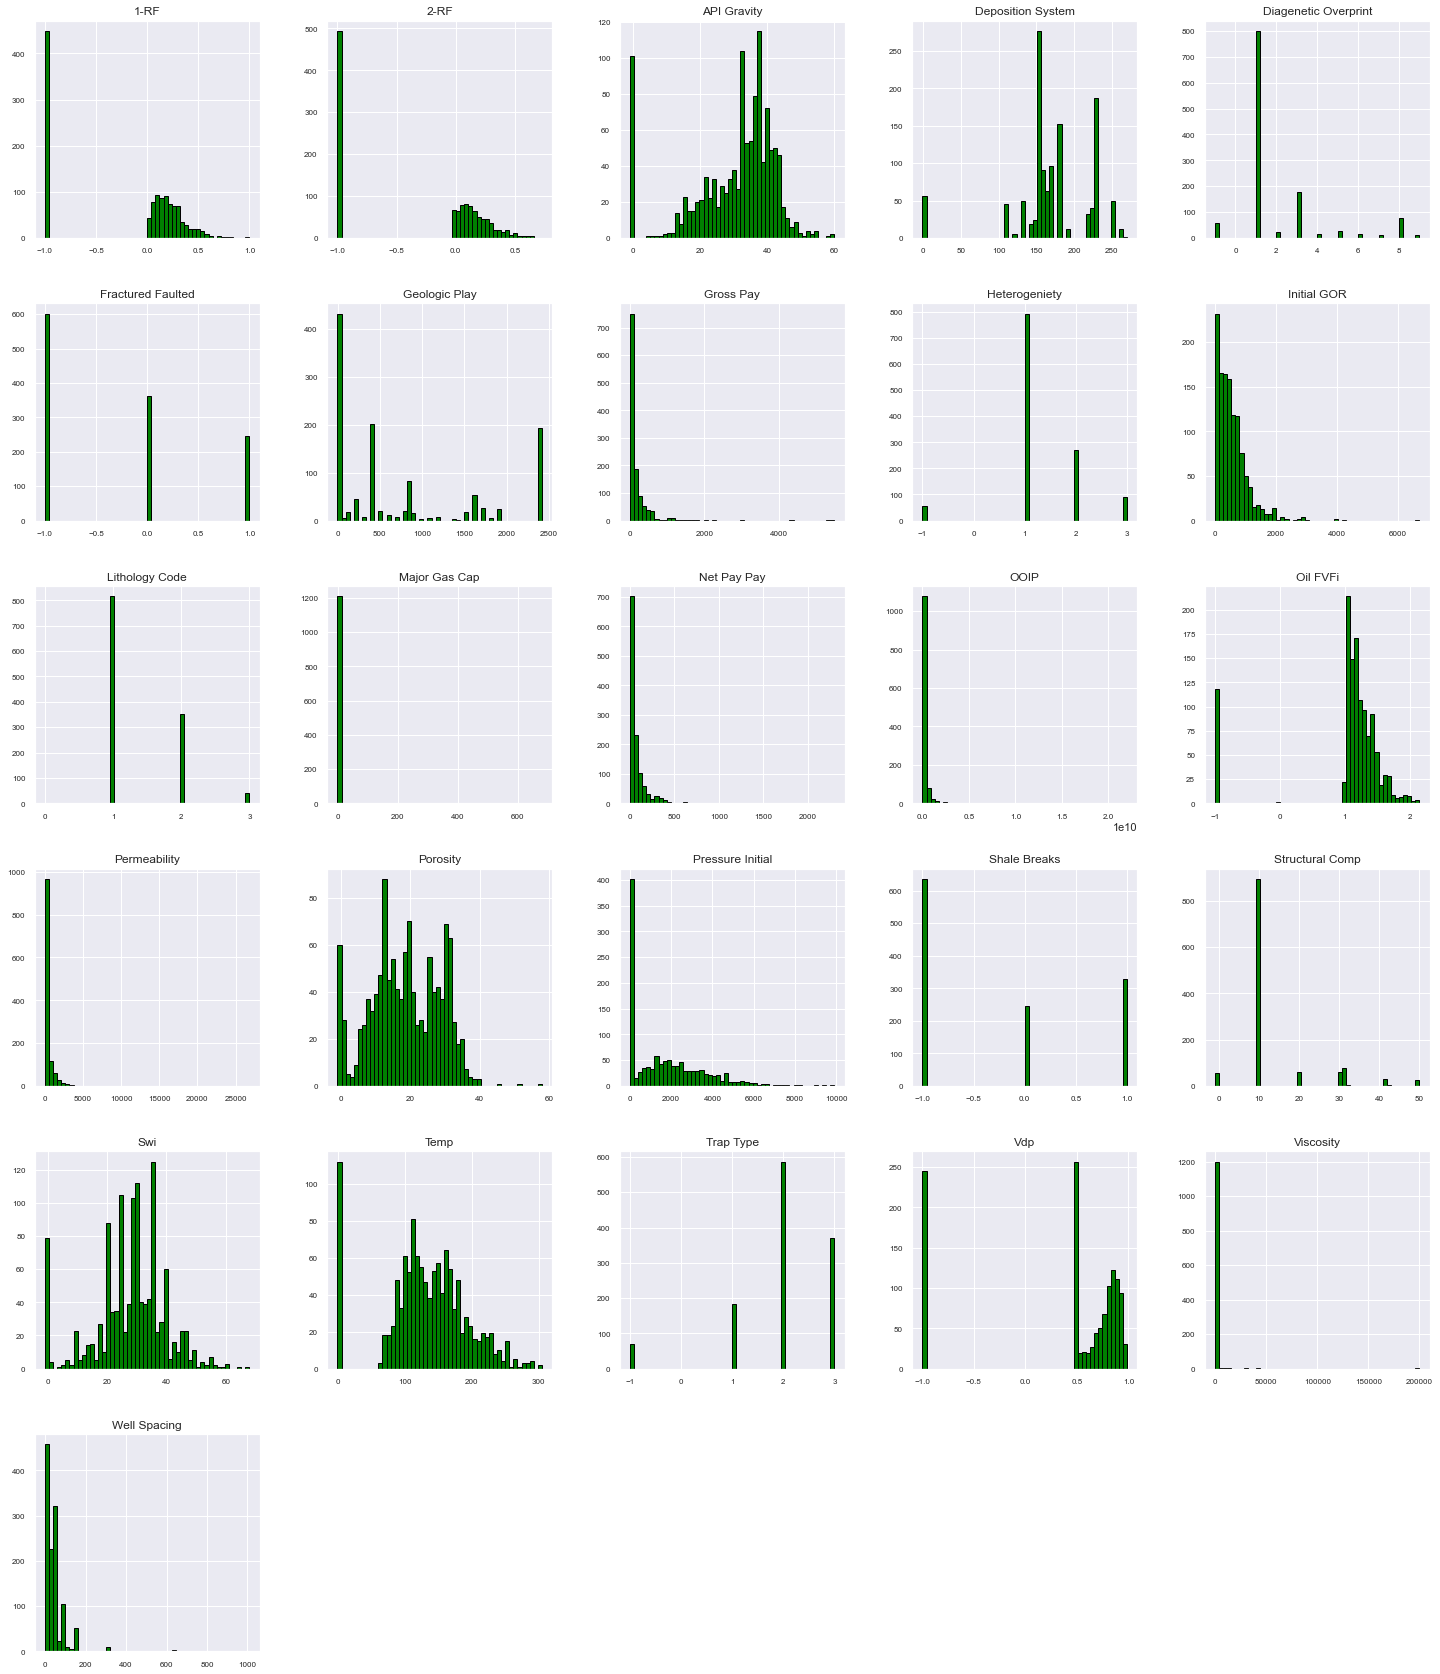

In [20]:
#Plot variables - Data Exploration 
fig_ = df.hist(figsize=(25, 30), bins=50, color="green",
                         edgecolor="black", xlabelsize=8, ylabelsize=8)

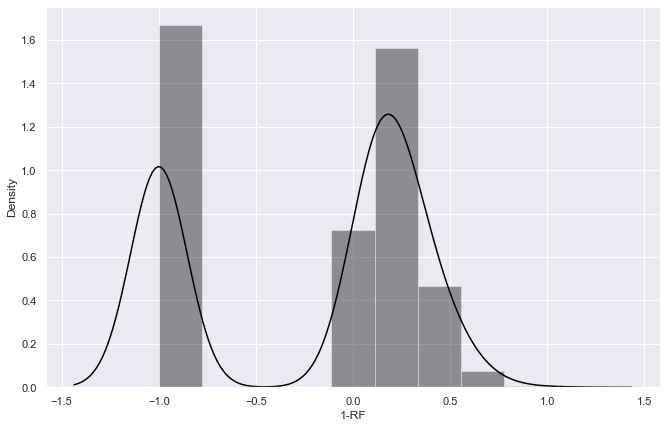

In [21]:
#Check Output varibale RFs
sns.set(rc = {"figure.figsize" : (11, 7)})
sns.distplot(df["1-RF"], color = "black");

In [22]:
#Drop rows with no RFs
df = df[df['1-RF'] != -1]
df = df[df['2-RF'] != -1]

In [23]:
#Evaluate Ultimate Recovery Factor (URF) 
df['URF'] = df['1-RF'] + df['2-RF']

In [24]:
#Drop Outliers, cut off at 70% 
df = df[df['URF'] < 0.7]

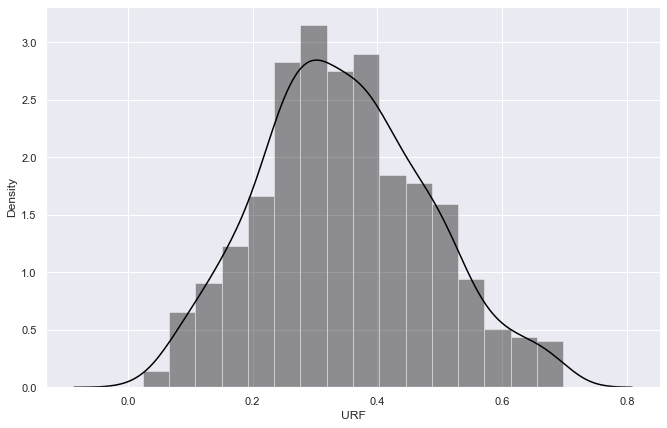

In [25]:
#Plot URF output variable 
sns.set(rc = {"figure.figsize" : (11, 7)})
sns.distplot(df["URF"], color = "black");

In [26]:
# SCREEN 3 Drop Unnecessary Columns
df.drop(['1-RF', '2-RF'
               ], axis=1, inplace=True)

In [27]:
df.shape

(655, 25)

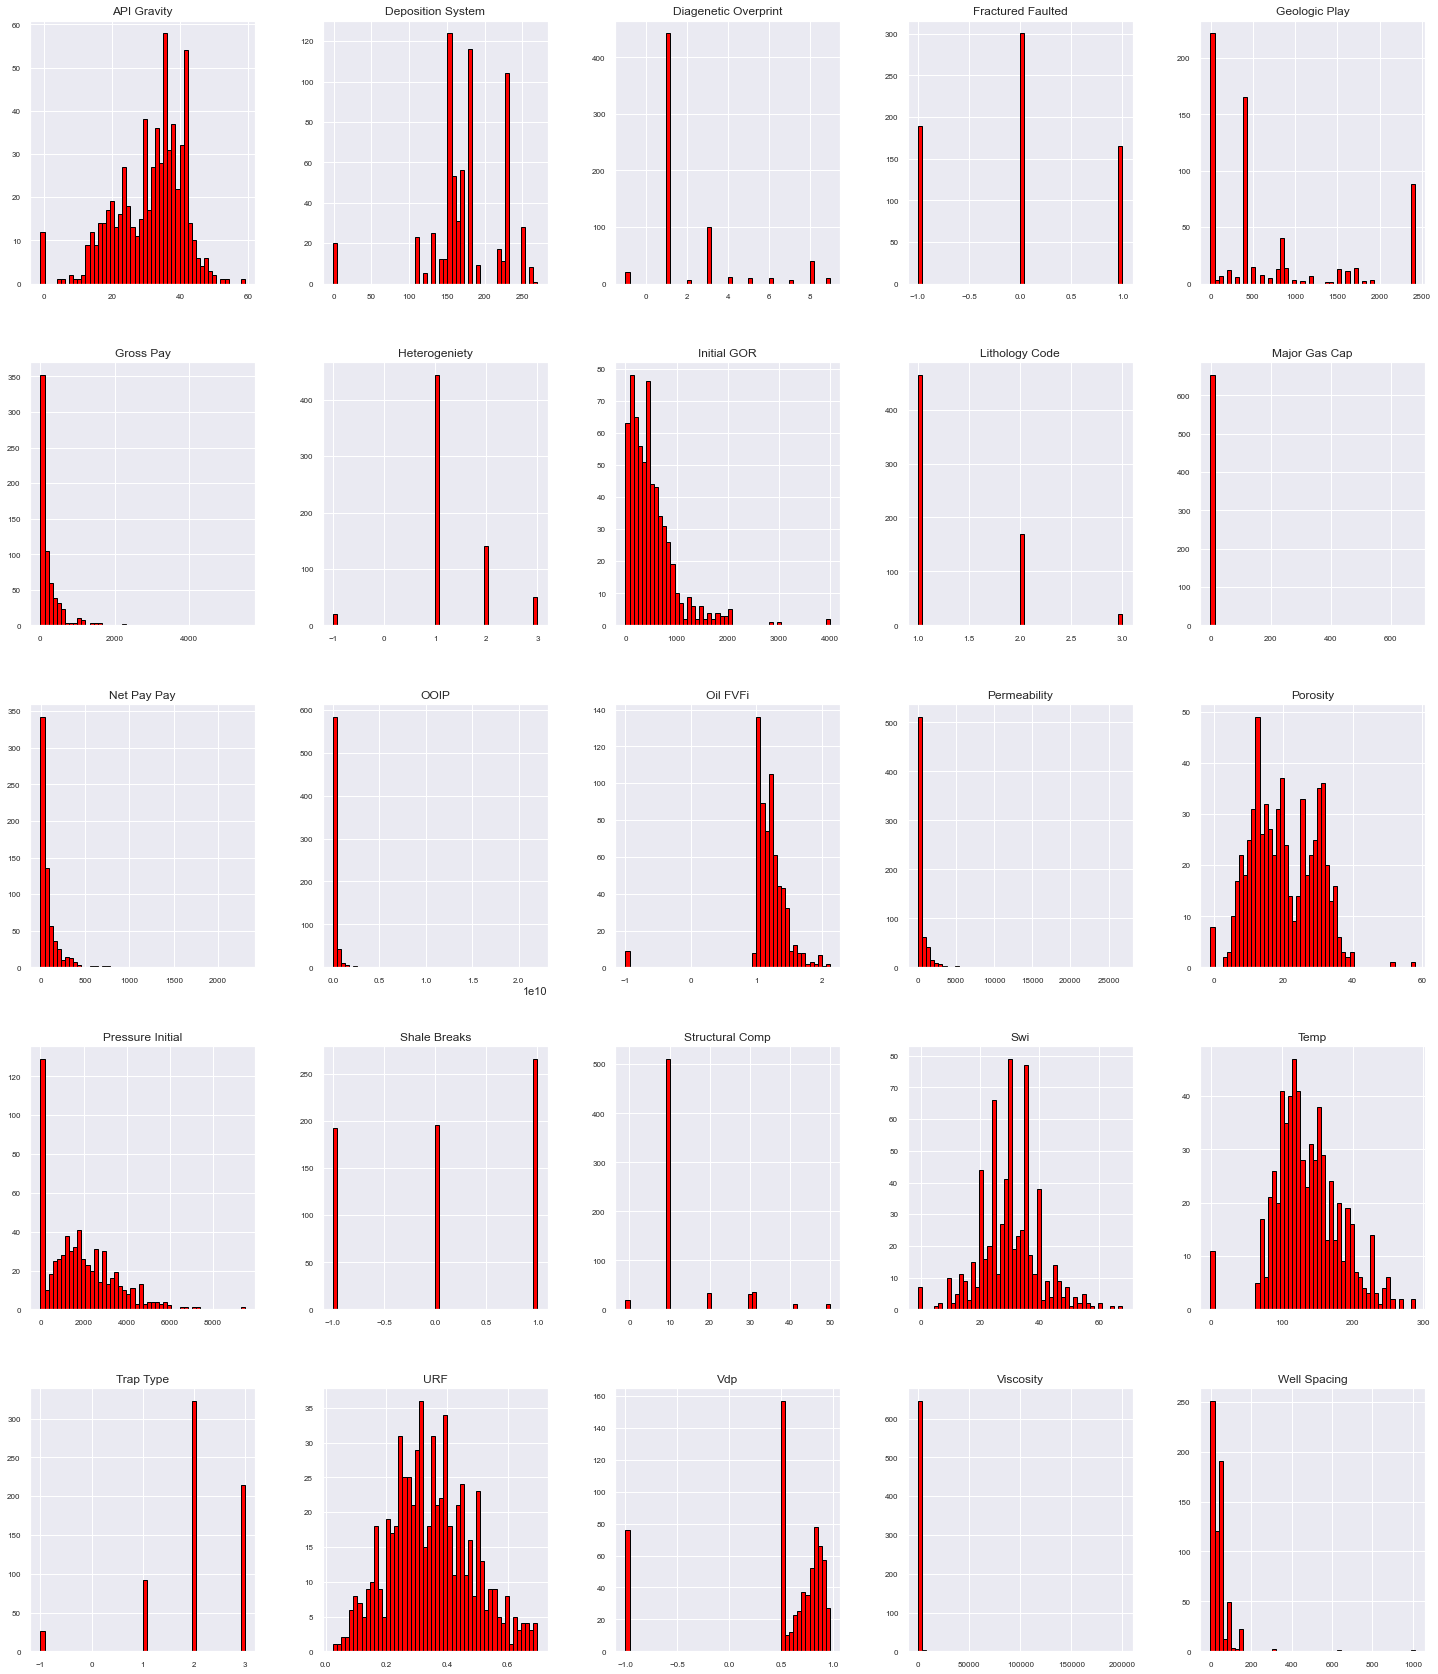

In [28]:
fig_ = df.hist(figsize=(25, 30), bins=50, color="red",
                         edgecolor="black", xlabelsize=8, ylabelsize=8)

In [29]:
#df = df[df['Deposition System'] != -1]

In [30]:
pd.set_option('display.max_rows', None)

In [31]:
a = 'Trap Type'
#print(df['API Gravity'].value_counts())
#df['API Gravity'](-1).count()
df[a].value_counts()
print(df[a].where(df[a] < 0).count())
print(df[a].where(df[a] == 0).count())

26
0


In [32]:
(df < 0).sum()

Lithology Code            0
Well Spacing             15
Net Pay Pay              11
Gross Pay                 0
Porosity                  8
Swi                       7
Oil FVFi                  9
Temp                     11
Permeability             12
API Gravity              12
Viscosity                14
OOIP                      5
Initial GOR               6
Pressure Initial        127
Vdp                      76
Fractured Faulted       189
Shale Breaks            193
Major Gas Cap           192
Geologic Play            20
Deposition System        20
Diagenetic Overprint     20
Structural Comp          20
Heterogeniety            20
Trap Type                26
URF                       0
dtype: int64

In [33]:
df.shape

(655, 25)

In [34]:
df = df[df['Major Gas Cap'] != -1]

In [35]:
#df = df[df['Vdp'] != -1]
# drop Vdp instead
df.drop(['Vdp'
               ], axis=1, inplace=True)

In [36]:
df = df[df['Well Spacing'] != -1]

In [37]:
df = df[df['Porosity'] != -1]

In [38]:
df = df[df['Temp'] != -1]

In [39]:
df = df[df['API Gravity'] != -1]

In [40]:
df = df[df['Net Pay Pay'] != -1]

In [41]:
(df < 0).sum()

Lithology Code           0
Well Spacing             0
Net Pay Pay              0
Gross Pay                0
Porosity                 0
Swi                      0
Oil FVFi                 0
Temp                     0
Permeability             0
API Gravity              0
Viscosity                0
OOIP                     0
Initial GOR              0
Pressure Initial        39
Fractured Faulted       17
Shale Breaks            16
Major Gas Cap            0
Geologic Play           12
Deposition System       12
Diagenetic Overprint    12
Structural Comp         12
Heterogeniety           12
Trap Type               16
URF                      0
dtype: int64

## Generate values for initial pressure values as a function of temperature

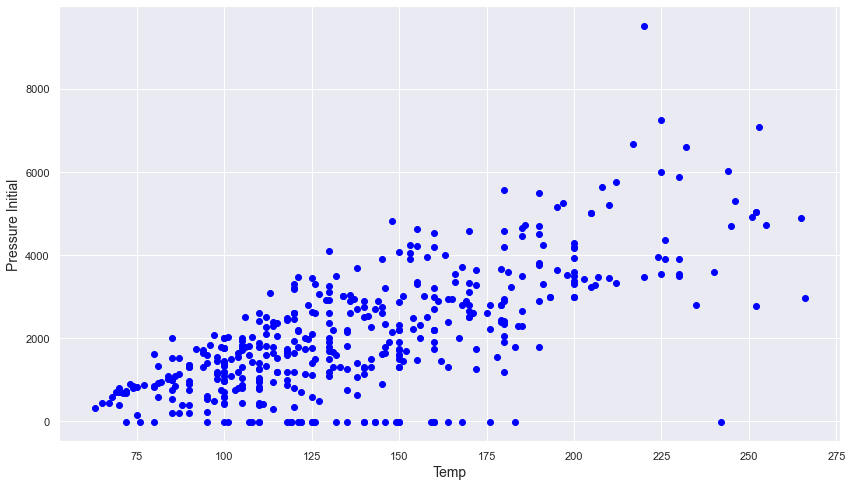

In [42]:
# Generate values for initial pressure values as a function of temperature
a = df['Temp']
b = df['Pressure Initial']

plt.figure(figsize=(14, 8))
plt.scatter(a, b, color='blue')
plt.xlabel("Temp", size=14)
plt.ylabel("Pressure Initial", size=14)
#plt.yscale('log', nonposy='clip')
#plt.gca().invert_yaxis()

#plt.tight_layout()
plt.show()

In [43]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
#fit = np.polyfit(np.log(x), y, 1)

# Start with Pressure
cdf = df[['Pressure Initial', 'Temp']]
testdf = cdf[cdf['Pressure Initial'] < 0].fillna(0)
traindf = cdf[cdf['Pressure Initial'] > 0].fillna(0)

y = traindf['Pressure Initial']
traindf.drop('Pressure Initial', axis=1, inplace=True)
ln_y = np.log(y)

lr.fit(traindf,ln_y)
testdf.drop('Pressure Initial', axis=1, inplace=True)
#pred = lr.predict(testdf)
pred = np.exp(lr.predict(testdf))
testdf['Pressure Initial'] = pred


#Coefficients
print("Gradient: ", lr.coef_)
print("Intercept: ", lr.intercept_)

testdf = testdf.rename(columns={'Temp': 'Temp_RPT', 
                                'Pressure Initial': 'Pressure Initial_RPT'
                               })

Gradient:  [0.01152813]
Intercept:  5.924115060257014


In [44]:
df = pd.concat([df, testdf], axis=1)

In [45]:
df['Pressure Initial'] = df['Pressure Initial_RPT'].fillna(0) + df['Pressure Initial'].fillna(0)

In [46]:
df = df.drop([
    'Temp_RPT', 'Pressure Initial_RPT', 
], axis = 1) 

In [47]:
df['Pressure Initial'].describe()

count     450.000000
mean     2247.636669
std      1360.791655
min       150.000000
25%      1298.058045
50%      1922.500000
75%      2984.250000
max      9500.000000
Name: Pressure Initial, dtype: float64

## Generate values for Viscosity values as a function of API Gravity (Dummy)

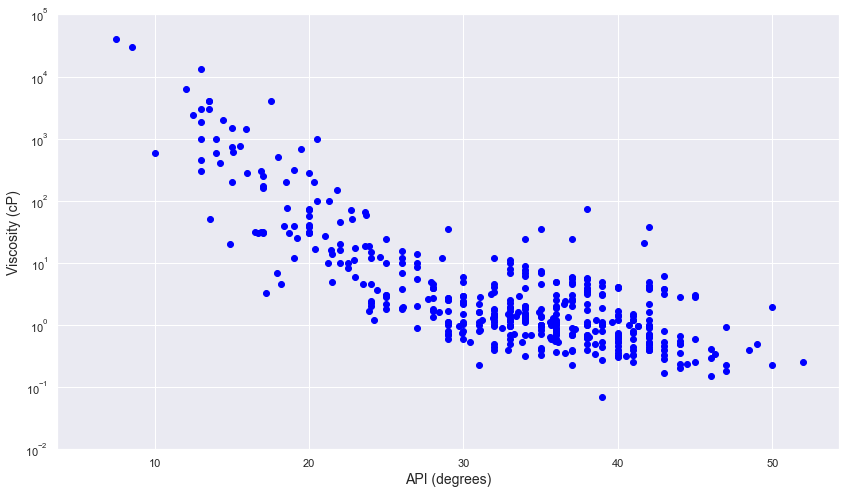

In [48]:
# Generate values for missing permeability values as a function of porosity
a = df['API Gravity']
b = df['Viscosity']

#b1 = df['RPT_Viscosity']

plt.figure(figsize=(14, 8))
plt.scatter(a, b, color='blue')
#plt.scatter(a, b1, color='orange')
plt.xlabel("API (degrees)", size=14)
plt.ylabel("Viscosity (cP)", size=14)
plt.yscale('log', nonposy='clip')
plt.ylim([0.01, 100000])
#plt.gca().invert_yaxis()



#plt.tight_layout()
plt.show()

In [49]:
lr = LinearRegression()
#fit = np.polyfit(np.log(x), y, 1)

cdf2 = df[['Viscosity', 'API Gravity']]
testdf2 = cdf2[cdf2['Viscosity'].isnull()==False].fillna(0)
traindf2 = cdf2[cdf2['Viscosity'].isnull()==False].fillna(0)

y2 = df['Viscosity']
traindf2.drop('Viscosity', axis=1, inplace=True)
ln_y2 = np.log(y2)

lr.fit(traindf2,ln_y2)
testdf2.drop('Viscosity', axis=1, inplace=True)
pred = lr.predict(testdf2)
pred2 = np.exp(lr.predict(testdf2))
testdf2['Viscosity'] = pred2


#Coefficients
print("Gradient: ", lr.coef_)
print("Intercept: ", lr.intercept_)

testdf2 = testdf2.rename(columns={'API Gravity': 'RPT_API Gravity', 
                                'Viscosity': 'RPT_Viscosity'
                               })

Gradient:  [-0.20476937]
Intercept:  7.820277270452799


In [50]:
df = pd.concat([df, testdf2], axis=1)

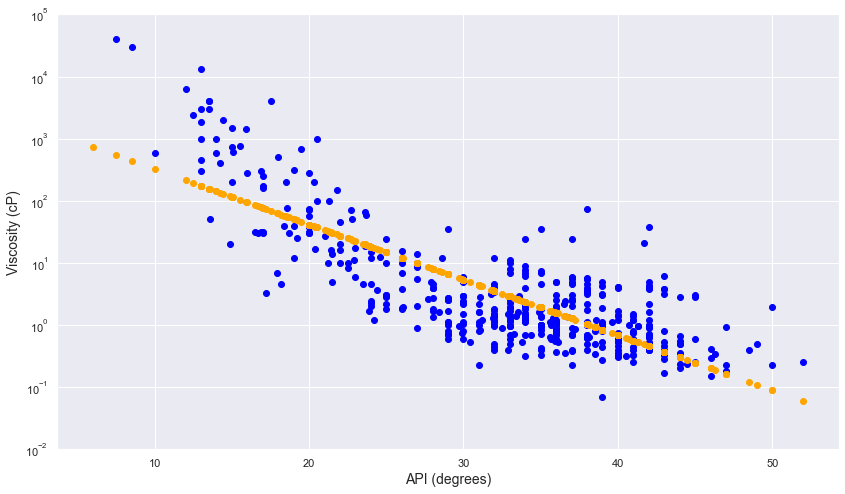

In [51]:
# Generate values for missing permeability values as a function of porosity
a = df['API Gravity']
b = df['Viscosity']

b1 = df['RPT_Viscosity']

plt.figure(figsize=(14, 8))
plt.scatter(a, b, color='blue')
plt.scatter(a, b1, color='orange')
plt.xlabel("API (degrees)", size=14)
plt.ylabel("Viscosity (cP)", size=14)
plt.yscale('log', nonposy='clip')
plt.ylim([0.01, 100000])
#plt.gca().invert_yaxis()



#plt.tight_layout()
plt.show()

In [52]:
df = df.drop([
    'RPT_Viscosity', 'RPT_API Gravity', 
], axis = 1) 

In [53]:
#df['Fractured Faulted'] = df['Fractured Faulted'].fillna(df['Fractured Faulted'].mode()[0])
df['Fractured Faulted'] = df['Fractured Faulted'].mask(df['Fractured Faulted'] < 0, df['Fractured Faulted'].mode()[0])

In [54]:
#df['Shale Breaks'] = df['Shale Breaks'].fillna(df['Shale Breaks'].mode()[0])
df['Shale Breaks'] = df['Shale Breaks'].mask(df['Shale Breaks'] < 0, df['Shale Breaks'].mode()[0])

In [55]:
#df['Trap Type'] = df['Trap Type'].fillna(df['Trap Type'].mode()[0])
df['Trap Type'] = df['Trap Type'].mask(df['Trap Type'] < 0, df['Trap Type'].mode()[0])

In [56]:
df['Geologic Play'] = df['Geologic Play'].mask(df['Geologic Play'] < 0, df['Geologic Play'].mode()[0])
df['Deposition System'] = df['Deposition System'].mask(df['Deposition System'] < 0, df['Deposition System'].mode()[0])
df['Diagenetic Overprint'] = df['Diagenetic Overprint'].mask(df['Diagenetic Overprint'] < 0, df['Diagenetic Overprint'].mode()[0])
df['Structural Comp'] = df['Structural Comp'].mask(df['Structural Comp'] < 0, df['Structural Comp'].mode()[0])
df['Heterogeniety'] = df['Heterogeniety'].mask(df['Heterogeniety'] < 0, df['Heterogeniety'].mode()[0])

In [57]:
(df < 0).sum()

Lithology Code          0
Well Spacing            0
Net Pay Pay             0
Gross Pay               0
Porosity                0
Swi                     0
Oil FVFi                0
Temp                    0
Permeability            0
API Gravity             0
Viscosity               0
OOIP                    0
Initial GOR             0
Pressure Initial        0
Fractured Faulted       0
Shale Breaks            0
Major Gas Cap           0
Geologic Play           0
Deposition System       0
Diagenetic Overprint    0
Structural Comp         0
Heterogeniety           0
Trap Type               0
URF                     0
dtype: int64

In [58]:
df.shape

(450, 24)

In [59]:
df['Initial GOR'] = df['Initial GOR'].mask(df['Initial GOR'] == 0, df['Initial GOR'].median())

In [60]:
df = df[df['Well Spacing'] != 0]

In [61]:
(df == 0).sum()

Lithology Code            0
Well Spacing              0
Net Pay Pay               0
Gross Pay                 0
Porosity                  0
Swi                       0
Oil FVFi                  0
Temp                      0
Permeability              0
API Gravity               0
Viscosity                 0
OOIP                      0
Initial GOR               0
Pressure Initial          0
Fractured Faulted       298
Shale Breaks            183
Major Gas Cap           351
Geologic Play             0
Deposition System         0
Diagenetic Overprint      0
Structural Comp           0
Heterogeniety             0
Trap Type                 0
URF                       0
dtype: int64

<Figure size 1440x1080 with 0 Axes>

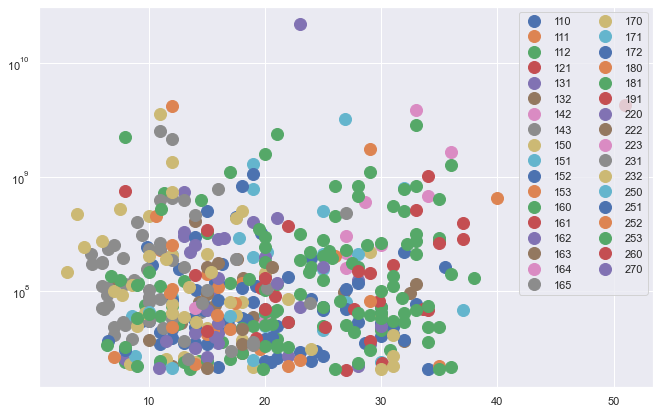

In [62]:
# Check if lithology impacts NTG
groups = df.groupby('Deposition System')
plt.figure(figsize=(20, 15))
fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group['Porosity'], group['OOIP'], marker='o', linestyle='', ms=12, label=name)
ax.legend(ncol=2)
ax.set_yscale("log")
#ax.set_xscale("log")

plt.show()

<Figure size 1440x1080 with 0 Axes>

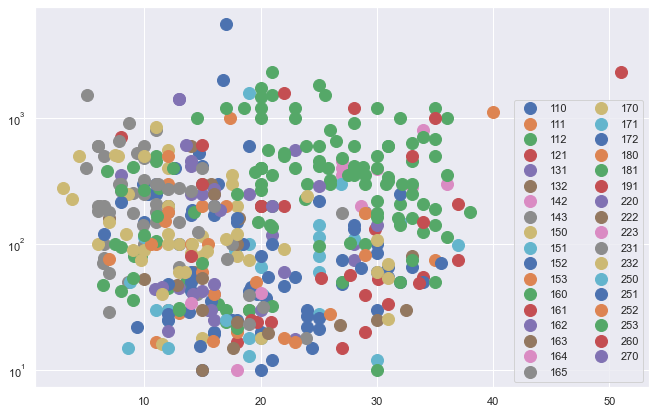

In [63]:
# Check if lithology impacts NTG
groups = df.groupby('Deposition System')
plt.figure(figsize=(20, 15))
fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group['Porosity'], group['Gross Pay'], marker='o', linestyle='', ms=12, label=name)
ax.legend()
ax.set_yscale("log")
ax.legend(ncol=2)
#ax.set_xscale("log")

plt.show()

In [64]:
df.to_excel(r'dftorisv2.xlsx', index = False, header=True)